In [50]:
from google.colab import drive
import zipfile
import os
drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/cred-data.zip'
extract_path = '/content/archive'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd
csv_file = '/content/archive/creditcard.csv'
df = pd.read_csv(csv_file)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [53]:
num_rows = df.shape[0]
print("Number of rows:", num_rows)

Number of rows: 284807


Epoch 10/100, Loss: 0.452825
Epoch 20/100, Loss: 0.448680
Epoch 30/100, Loss: 0.446969
Epoch 40/100, Loss: 0.446272
Epoch 50/100, Loss: 0.445352
Epoch 60/100, Loss: 0.444677
Epoch 70/100, Loss: 0.444420
Epoch 80/100, Loss: 0.444074
Epoch 90/100, Loss: 0.444071
Epoch 100/100, Loss: 0.443648
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.941505
Training Set Performance:
Confusion Matrix:
[[227334    117]
 [    56    338]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9995    0.9996    227451
           1     0.7429    0.8579    0.7962       394

    accuracy                         0.9992    227845
   macro avg     0.8713    0.9287    0.8979    227845
weighted avg     0.9993    0.9992    0.9993    227845

Test Set Performance:
Confusion Matrix:
[[56812    52]
 [   13    85]]

Classification Report:
              precision    recall  f1-score   support

     

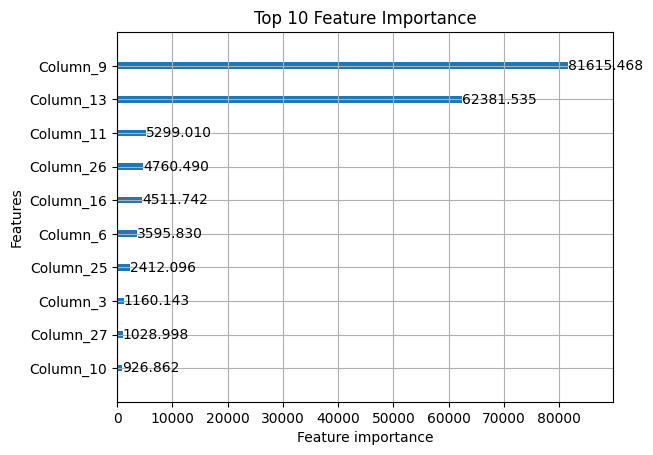

In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt

#drop the 'Time' column as it's not needed
df = pd.read_csv('/content/archive/creditcard.csv')
df = df.drop(['Time'], axis=1)


X = df.drop(['Class'], axis=1).values
y = df['Class'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#use only non-fraud transactions for training
normal_data = X_scaled[y == 0]
X_train_ae, X_val_ae = train_test_split(normal_data, test_size=0.2, random_state=42)

#autoencoder class with one hidden layer
class Autoencoder:
    def __init__(self, input_size, hidden_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, input_size) * 0.01
        self.b2 = np.zeros((1, input_size))
#relu activation func
    def relu(self, x):
        return np.maximum(0, x)
#derivative of relu
    def relu_derivative(self, x):
        return (x > 0).astype(float)
#encode then decode in forwardpass
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.z2
        return self.a2

#MSE loss between input and reconstruction
    def compute_loss(self, X, reconstructed):
        return np.mean((X - reconstructed) ** 2)

#backpropagation for weight and bias updation
    def backward(self, X, reconstructed, learning_rate=0.001):
        m = X.shape[0]
        d_loss_a2 = 2 * (reconstructed - X) / m
        d_W2 = np.dot(self.a1.T, d_loss_a2)
        d_b2 = np.sum(d_loss_a2, axis=0, keepdims=True)
        d_a1 = np.dot(d_loss_a2, self.W2.T)
        d_z1 = d_a1 * self.relu_derivative(self.z1)
        d_W1 = np.dot(X.T, d_z1)
        d_b1 = np.sum(d_z1, axis=0, keepdims=True)

#parameter updation by gradient descent(GD)
        self.W2 -= learning_rate * d_W2
        self.b2 -= learning_rate * d_b2
        self.W1 -= learning_rate * d_W1
        self.b1 -= learning_rate * d_b1

#train the autoencoder using mini-batch GD
    def fit(self, X, epochs=100, batch_size=256, learning_rate=0.001):
        for epoch in range(epochs):
            indices = np.random.permutation(len(X))
            X_shuffled = X[indices]
            for start_idx in range(0, len(X), batch_size):
                end_idx = start_idx + batch_size
                batch = X_shuffled[start_idx:end_idx]
                reconstructed = self.forward(batch)
                self.backward(batch, reconstructed, learning_rate)
            if (epoch + 1) % 10 == 0:
                # Print loss every 10 epochs
                full_reconstruction = self.forward(X)
                loss = self.compute_loss(X, full_reconstruction)
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.6f}")

#train autoencoder on non-fraud transactions
input_size = X_train_ae.shape[1]
hidden_size = 14
autoencoder = Autoencoder(input_size, hidden_size)
autoencoder.fit(X_train_ae, epochs=100, batch_size=256, learning_rate=0.001)

#compute (MSE) for all samples(non-fraud + fraud)
reconstructed_all = autoencoder.forward(X_scaled)
reconstruction_error = np.mean((X_scaled - reconstructed_all) ** 2, axis=1).reshape(-1, 1)

#add MSE error as additional feature
X_augmented = np.hstack((X_scaled, reconstruction_error))

#split data into train-test for LightGBM classifier
X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(
    X_augmented, y, test_size=0.2, random_state=42, stratify=y)

train_data = lgb.Dataset(X_train_lgb, label=y_train_lgb)
test_data = lgb.Dataset(X_test_lgb, label=y_test_lgb, reference=train_data)

#define parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1,
    'seed': 42
}

#train LightGBM
num_rounds = 100
bst = lgb.train(params, train_data, num_rounds, valid_sets=[test_data],
                callbacks=[lgb.early_stopping(stopping_rounds=10)])

#predict probabilities on test set
y_pred_prob_test = bst.predict(X_test_lgb)
#convert probabilities to binary predictions(threshold 0.5)
y_pred_test = (y_pred_prob_test > 0.5).astype(int)

#predict on train set
y_pred_prob_train = bst.predict(X_train_lgb)
y_pred_train = (y_pred_prob_train > 0.5).astype(int)

#train evaluation
print("Training Set Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_train_lgb, y_pred_train))
print("\nClassification Report:")
print(classification_report(y_train_lgb, y_pred_train, digits=4))

#test evaulation
print("Test Set Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test_lgb, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test_lgb, y_pred_test, digits=4))

#feature importance graph
lgb.plot_importance(bst, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importance")
plt.show()


In [49]:
bst.save_model('lightgbm_fraud_model.txt')